<a href="https://colab.research.google.com/github/MingzheHu-Duke/CS5343/blob/main/CS534HW1Q4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
x_noise = pd.read_csv("HW1_4X.csv").to_numpy()
y_noise = pd.read_csv("HW1_4Y.csv").to_numpy()
print(x_noise.shape, y_noise.shape)

**4.a.**

In [95]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
Input=[('polynomial',PolynomialFeatures(degree=2)),('modal',LinearRegression())]
pipe=Pipeline(Input)

In [98]:
pipe.fit(x_noise, y_noise)

Pipeline(memory=None,
         steps=[('polynomial',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('modal',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [112]:
t = np.arange(-1.0, 1.0, 0.01)
poly_pred = pipe.predict(t.reshape(-1, 1))

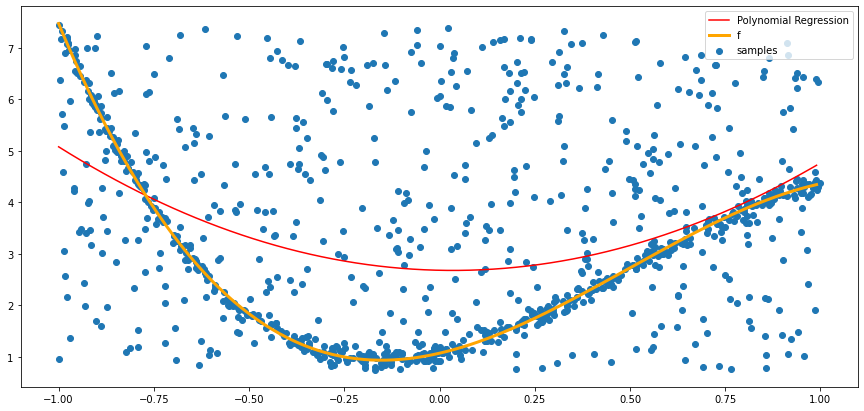

In [117]:
plt.figure(figsize=(15, 7))
plt.scatter(x_noise, y_noise, label="samples")
plt.plot(t, poly_pred, color="red", label="Polynomial Regression")
plt.plot(t, -3.2591*t**3 + 4.8439*t**2 + 1.7046*t + 1.0685 ,color="orange", label="f", linewidth=3)
plt.legend()
plt.show()

**4.b**

In [71]:
def find_intercept_point(m, c, x0, y0):
    """ find an intercept point of the line model with
        a normal from point (x0,y0) to it
    :param m slope of the line model
    :param c y-intercept of the line model
    :param x0 point's x coordinate
    :param y0 point's y coordinate
    :return intercept point
    """
 
    # intersection point with the model
    x = (x0 + m*y0 - m*c)/(1 + m**2)
    y = (m*x0 + (m**2)*y0 - (m**2)*c)/(1 + m**2) + c
 
    return x, y

In [85]:
def ransac_plot(n, x, y, m, c, final=False, x_in=(), y_in=(), points=()):
    """ plot the current RANSAC step
    :param n      iteration
    :param points picked up points for modeling
    :param x      samples x
    :param y      samples y
    :param m      slope of the line model
    :param c      shift of the line model
    :param x_in   inliers x
    :param y_in   inliers y
    """
 
    fname = "output/figure_" + str(n) + ".png"
    line_width = 1.
    line_color = '#0080ff'
    title = 'iteration ' + str(n)
 
    if final:
        fname = "output/final.png"
        line_width = 3.
        line_color = '#ff0000'
        title = 'final solution'
 
    plt.figure("Ransac", figsize=(15., 15.))
 
    # grid for the plot
    # grid = [min(x) - 10, max(x) + 10, min(y) - 20, max(y) + 20]
    # plt.axis(grid)
 
    # put grid on the plot
    plt.grid(b=True, which='major', color='0.75', linestyle='--')
    # plt.xticks([i for i in int(np.floor(range(min(x) - 10)), int(np.ceil(max(x) + 10, 5)))])
    # plt.yticks([i for i in int(np.floor(range(min(y) - 20)), int(np.ceil(max(y) + 20, 10)))])
 
    # plot input points
    plt.plot(x[:,0], y[:,0], marker='o', label='Input points', color='#00cc00', linestyle='None', alpha=0.4)
 
    # draw the current model
    plt.plot(x, m*x + c, 'r', label='Line model', color=line_color, linewidth=line_width)

    # plot function f
    t = np.arange(-1.0, 1.0, 0.01)
    plt.plot(t, -3.2591*t**3 + 4.8439*t**2 + 1.7046*t + 1.0685 ,color="orange", label="f", linewidth=2.0)
 
    # draw inliers
    if not final:
      plt.plot(x_in, y_in, marker='o', label='Inliers', linestyle='None', color='#ff0000', alpha=0.6)
 
    # draw points picked up for the modeling
    if not final:
      plt.plot(points[:,0], points[:,1], marker='o', label='Picked points', color='#0000cc', linestyle='None', alpha=0.6)
 
    plt.title(title)
    plt.legend()
    plt.savefig(fname)
    plt.show()
    plt.close()

In [73]:
def find_line_model(points):
    """ find a line model for the given points
    :param points selected points for model fitting
    :return line model
    """
 
    # [WARNING] vertical and horizontal lines should be treated differently
    #           here we just add some noise to avoid division by zero
 
    # find a line model for these points
    m = (points[1,1] - points[0,1]) / (points[1,0] - points[0,0] + sys.float_info.epsilon)  # slope (gradient) of the line
    c = points[1,1] - m * points[1,0]                                     # y-intercept of the line
 
    return m, c

In [74]:
import pandas as pd
x_noise = pd.read_csv("HW1_4X.csv").to_numpy()
y_noise = pd.read_csv("HW1_4Y.csv").to_numpy()
print(x_noise.shape, y_noise.shape)

(999, 1) (999, 1)


In [75]:
# Ransac parameters
import numpy as np
import scipy
import matplotlib.pyplot as plt
import math
import sys
ransac_iterations = 20  # number of iterations
ransac_threshold = 0.3    # threshold
ransac_ratio = 0.4      # ratio of inliers required to assert
                        # that a model fits well to data
 
 
n_inputs = 1
n_outputs = 1

  inlier ratio = {} 0.866
  model_m = 2.609800226159066
  model_c = 1.6515815032039205


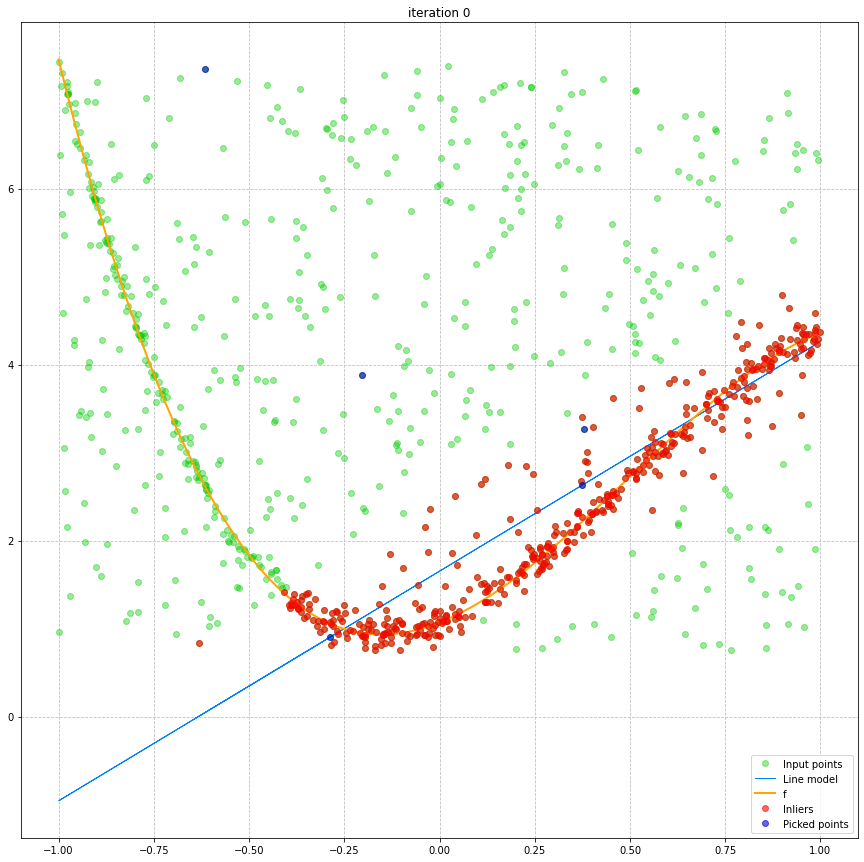

The model is found !


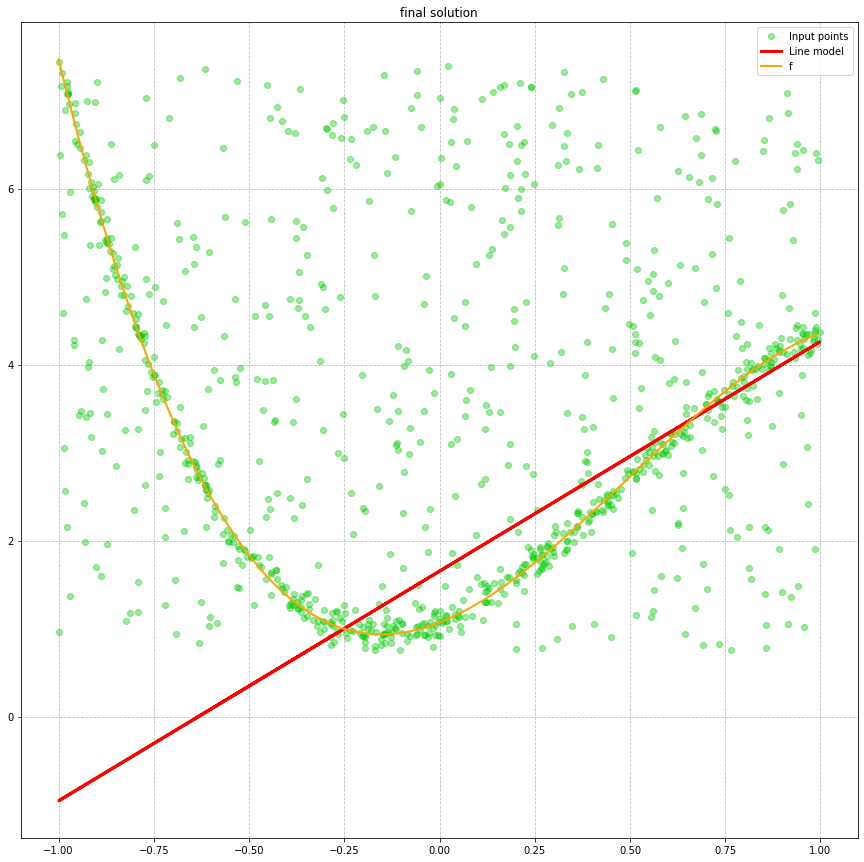


Final model:

  ratio = 0.866
  model_m = 2.609800226159066
  model_c = 1.6515815032039205


In [93]:
data = np.hstack( (x_noise,y_noise) )
 
ratio = 0.
model_m = 0.
model_c = 0.
 
# perform RANSAC iterations
for it in range(ransac_iterations):
 
    # pick up two random points
    n = 5
 
    all_indices = np.arange(x_noise.shape[0])
    np.random.shuffle(all_indices)
 
    indices_1 = all_indices[:n]
    indices_2 = all_indices[n:]
 
    maybe_points = data[indices_1,:]
    test_points = data[indices_2,:]
 
    # find a line model for these points
    m, c = find_line_model(maybe_points)
 
    x_list = []
    y_list = []
    num = 0
 
    # find orthogonal lines to the model for all testing points
    for ind in range(test_points.shape[0]):
 
        x0 = test_points[ind,0]
        y0 = test_points[ind,1]
 
        # find an intercept point of the model with a normal from point (x0,y0)
        x1, y1 = find_intercept_point(m, c, x0, y0)
 
        # distance from point to the model
        dist = math.sqrt((x1 - x0)**2 + (y1 - y0)**2)
 
        # check whether it's an inlier or not
        if dist < ransac_threshold:
            x_list.append(x0)
            y_list.append(y0)
            num += 1
 
    x_inliers = np.array(x_list)
    y_inliers = np.array(y_list)
 
    # in case a new model is better - cache it
    if num/float(n_samples) > ratio:
        ratio = num/float(n_samples)
        model_m = m
        model_c = c
 
    print('  inlier ratio = {}', num/float(n_samples))
    print('  model_m = {}'.format(model_m))
    print('  model_c = {}'.format(model_c))
 
    # plot the current step
    ransac_plot(it, x_noise,y_noise, m, c, False, x_inliers, y_inliers, maybe_points)
 
    # we are done in case we have enough inliers
    if num > n_samples*ransac_ratio:
        print('The model is found !')
        break
 
# plot the final model
ransac_plot(0, x_noise,y_noise, model_m, model_c, True)
 
print('\nFinal model:\n')
print('  ratio = {}'.format(ratio))
print('  model_m = {}'.format(model_m))
print('  model_c = {}'.format(model_c))